✅ Data Loaded. Shape: (421570, 21)
🎄 Marking specific holidays...
🔗 Creating interaction features...
🔠 Encoding categorical variables...
⚙️ Generatng Time-Series features (Lags & Rolling)... this may take a moment.
Feature Engineering Complete.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Is_SuperBowl,Is_LaborDay,Is_Thanksgiving,Is_Christmas,Total_MarkDown,Type_Encoded,Lag_1,Lag_52,Rolling_Mean_4,Rolling_Std_4
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,...,0,0,0,0,0.0,3,0.00,0.0,0.00,0.000000
2955,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,0.0,...,1,0,0,0,0.0,3,24924.50,0.0,0.00,0.000000
5911,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,0.0,...,0,0,0,0,0.0,3,46039.49,0.0,0.00,0.000000
8888,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,0.0,...,0,0,0,0,0.0,3,41595.55,0.0,32990.77,12832.106391
11839,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,0.0,...,0,0,0,0,0.0,3,19403.54,0.0,32216.62,13554.047185


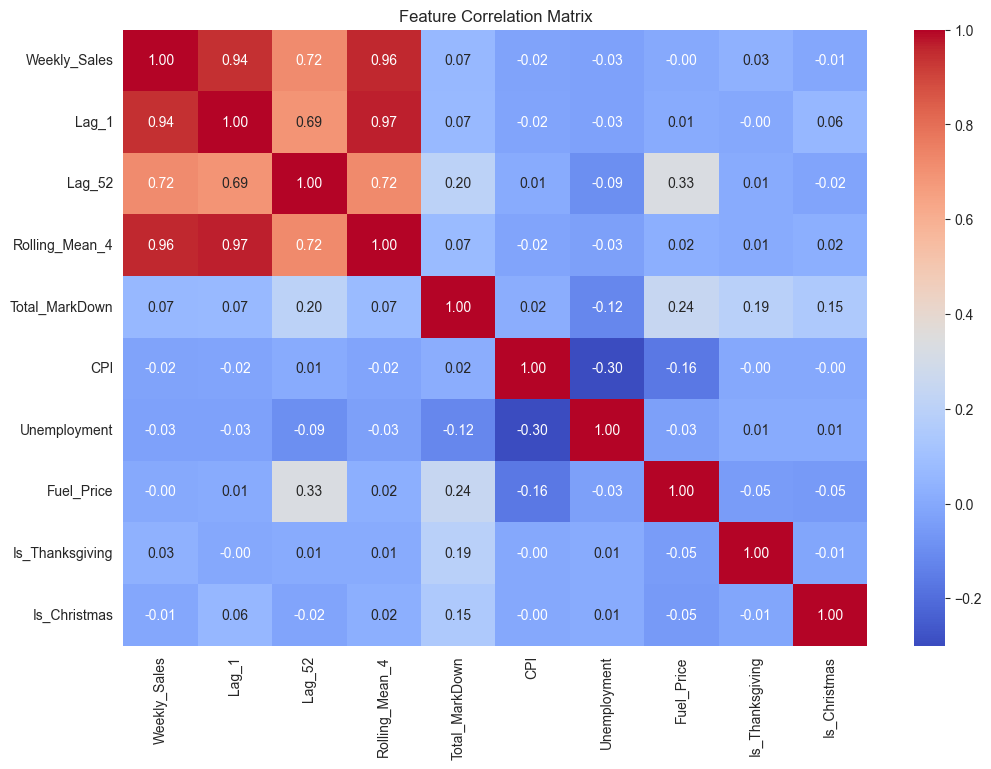

✅ Model Ready data saved to: ../data/processed/model_ready_data.csv
   Final Feature Count: 31


In [1]:
# %% [markdown]
# # ⚙️ Step 4: Feature Engineering
# **Project:** Integrated Retail Analytics
#
# **Objective:**
# To create advanced features for Machine Learning models.
# 1. **Lag Features:** Past sales data (e.g., Sales last week).
# 2. **Rolling Features:** Trends (e.g., 4-week moving average).
# 3. **Holiday Features:** Specific flags for Super Bowl, Christmas, etc.
# 4. **Encoding:** Transforming categorical data (Store Type).

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.features import FeatureEngineer

# Set visual style
sns.set_style("whitegrid")

# Load Cleaned Data (or data with anomalies if you preferred)
data_path = "../data/processed/clean_retail_data.csv"
if not os.path.exists(data_path):
    print("❌ Error: Clean data not found. Run previous notebooks.")
else:
    df = pd.read_csv(data_path)
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Data Loaded. Shape: {df.shape}")

# %% [markdown]
# ## 2. Apply Feature Engineering
# We use the `FeatureEngineer` class to create our new variables.

# %%
engineer = FeatureEngineer(df)

# 1. Create Special Holiday Flags (Super Bowl, Christmas, etc.)
df = engineer.create_special_holiday_features()

# 2. Create Interaction Features (Total Markdown)
df = engineer.create_interaction_features()

# 3. Encode Categorical (Store Type A/B/C)
df = engineer.encode_categorical()

# 4. Create Time-Series Features (Lags & Rolling)
# Note: This might take a minute on large datasets because it groups by Store/Dept
df = engineer.create_time_series_features()

print("Feature Engineering Complete.")
display(df.head())

# %% [markdown]
# ## 3. Feature Correlation Analysis
# Which new features correlate most with Weekly Sales?

# %%
# Select numerical columns for correlation
corr_cols = [
    'Weekly_Sales', 'Lag_1', 'Lag_52', 'Rolling_Mean_4', 
    'Total_MarkDown', 'CPI', 'Unemployment', 'Fuel_Price', 
    'Is_Thanksgiving', 'Is_Christmas'
]

plt.figure(figsize=(12, 8))
# compute correlation
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# %% [markdown]
# **Observation:**
# * `Lag_1` and `Rolling_Mean_4` usually have very high correlation with `Weekly_Sales` (Autocorrelation).
# * `Is_Thanksgiving` should show a moderate positive correlation due to Black Friday sales.

# %% [markdown]
# ## 4. Save "Model Ready" Data
# This dataset is now ready for forecasting and segmentation models.

# %%
output_path = "../data/processed/model_ready_data.csv"
df.to_csv(output_path, index=False)
print(f"✅ Model Ready data saved to: {output_path}")
print(f"   Final Feature Count: {df.shape[1]}")